In [14]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.interpolate import interp1d
import glob
import bisect

from gwtess import Gwtess, Gwtess_galaxy
%matplotlib inline

In [37]:
fn = '/Users/tom/gitcode/Kasen_Kilonova_Models_2017/kilonova_models/knova_d1_n10_m0.040_vk0.15_Xlan1e-2.0.h5'

In [38]:
fin = h5py.File(fn, 'r')

In [39]:
nu    = np.array(fin['nu'],dtype='d')
# array of time in seconds
times = np.array(fin['time'])
# covert time to days
times = times/3600.0/24.0

In [40]:
# specific luminosity (ergs/s/Hz)
# this is a 2D array, Lnu[times][nu]
Lnu_all   = np.array(fin['Lnu'],dtype='d')

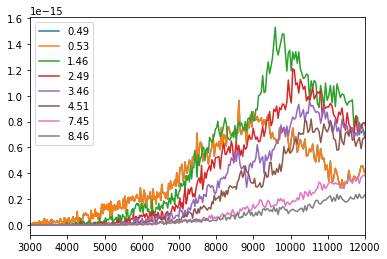

In [47]:
# for example, get the spectrum at day 2.0
for t in [0.49, 0.53, 1.46, 2.49, 3.46, 4.51, 7.45, 8.46]:


    t = t
    # index corresponding to t
    it = bisect.bisect(times,t)
    # spectrum at this epoch
    Lnu = Lnu_all[it,:]
    
    # if you want thing in Flambda (ergs/s/Angstrom)
    c    = 2.99e10
    lam  = c/nu*1e8
    Llam = Lnu*nu**2.0/c/1e8
    
    #plot it up
    plt.plot(lam,Llam / (40 * 1.E6*3.086e+18)**2, label = t)
    plt.xlim(3000,12000)
    
    outx = lam[::-1]
    outy = Llam[::-1] / (40 * 1.E6*3.086e+18)**2
    
    outy = outy[outx > 4000]
    outx = outx[outx > 4000]

    
    np.savetxt('../data/redknova-at-{}.csv'.format(t),
                        np.array([outx,outy]).T,
              delimiter=',')
    
plt.legend()
    
    
    

In [44]:

lam

array([ 99467.73103484,  99071.4445654 ,  98676.73925402, ...,
          150.891639  ,    150.29048241,    149.74514882])

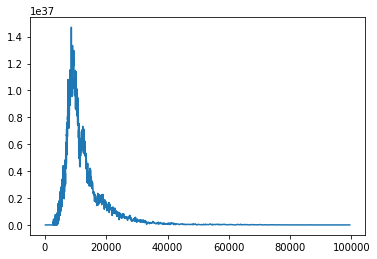